In [111]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [112]:
df_train = pd.read_csv("train.csv") # 학습용 데이터
df_test = pd.read_csv("submission.csv") # 테스트 데이터(제출파일의 데이터)

In [113]:
print(df_train.shape)
print(df_test.shape)

(59299, 29)
(5271, 30)


In [114]:
df_train.columns

Index(['bant_submit', 'customer_country', 'business_unit',
       'com_reg_ver_win_rate', 'customer_idx', 'customer_type', 'enterprise',
       'historical_existing_cnt', 'id_strategic_ver', 'it_strategic_ver',
       'idit_strategic_ver', 'customer_job', 'lead_desc_length',
       'inquiry_type', 'product_category', 'product_subcategory',
       'product_modelname', 'customer_country.1', 'customer_position',
       'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
       'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area',
       'business_subarea', 'lead_owner', 'is_converted'],
      dtype='object')

In [115]:
df_train=df_train[df_train["customer_idx"]!=25096]

In [116]:
df_train = df_train[(df_train["business_unit"] != "CM") & (df_train["business_unit"] != "Solution")]

In [117]:
df_train.shape

(56582, 29)

In [118]:
df_train["is_converted"].value_counts()

is_converted
False    54154
True      2428
Name: count, dtype: int64

In [119]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56582 entries, 0 to 59297
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              56582 non-null  float64
 1   customer_country         55691 non-null  object 
 2   business_unit            56582 non-null  object 
 3   com_reg_ver_win_rate     14525 non-null  float64
 4   customer_idx             56582 non-null  int64  
 5   customer_type            15337 non-null  object 
 6   enterprise               56582 non-null  object 
 7   historical_existing_cnt  13682 non-null  float64
 8   id_strategic_ver         3433 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4554 non-null   float64
 11  customer_job             38408 non-null  object 
 12  lead_desc_length         56582 non-null  int64  
 13  inquiry_type             55719 non-null  object 
 14  product_category         37

## 컬럼별 음미

### 1. bant_submit

In [120]:
np.array(df_train["bant_submit"].value_counts())/df_train.shape[0]

array([0.29330883, 0.28563854, 0.22051182, 0.19257008, 0.00797073])

In [121]:
np.array(df_test["bant_submit"].value_counts())/df_test.shape[0]

array([0.39271485, 0.28874976, 0.12654145, 0.10339594, 0.08859799])

In [122]:
df_train["bant_submit"].value_counts()

bant_submit
0.50    16596
1.00    16162
0.25    12477
0.75    10896
0.00      451
Name: count, dtype: int64

In [123]:
df_test["bant_submit"].value_counts()

bant_submit
1.00    2070
0.25    1522
0.50     667
0.75     545
0.00     467
Name: count, dtype: int64

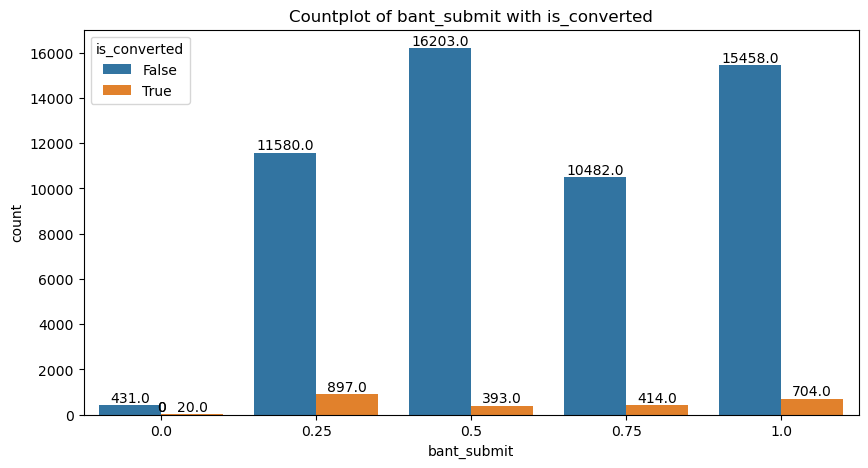

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'bant_submit'에 대한 각 카테고리의 개수를 'is_converted'에 따라 나누어 countplot 그리기
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='bant_submit', hue='is_converted', data=df_train)

# 각 막대 위에 count를 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Countplot of bant_submit with is_converted')
plt.show()

In [125]:
correlation_value = df_train['bant_submit'].corr(df_train['is_converted'])
print(f"Correlation between 'bant_submit' and 'is_converted': {correlation_value}")

Correlation between 'bant_submit' and 'is_converted': -0.030143135763306055


### customer_country

In [126]:
df_train["customer_country"].value_counts()

customer_country
//India                     2904
/São Paulo/Brazil           1315
//United States              962
//United Kingdom             796
//Italy                      704
                            ... 
/Partur/India                  1
/Suri/India                    1
Infinity_elec@yahoo.com        1
bahaa.creative@gmail.com       1
/santa cruz bolivia/Peru       1
Name: count, Length: 14852, dtype: int64

In [127]:
df_train["customer_country"].nunique()

14852

In [128]:
df_test["customer_country"].value_counts()

customer_country
/  / Peru                           184
//United States                     160
Corporate /  /                      135
/  / Brazil                         132
/  / India                          116
                                   ... 
/ São Paulo/ Guarujá / Brazil         1
/ New York  / United States           1
/ Cortes / Honduras                   1
1233 20th St NW   / Washington /      1
/ Ongole  / India                     1
Name: count, Length: 2467, dtype: int64

### 3. business_unit

In [129]:
display(df_train["business_unit"].value_counts())
display(df_test["business_unit"].value_counts())
display(np.array(df_train["business_unit"].value_counts())/df_train.shape[0])
display(np.array(df_test["business_unit"].value_counts())/df_test.shape[0])

business_unit
ID    24104
AS    23889
IT     8589
Name: count, dtype: int64

business_unit
AS    2410
ID    2342
IT     519
Name: count, dtype: int64

array([0.4260012 , 0.42220141, 0.15179739])

array([0.45721874, 0.44431797, 0.09846329])

In [130]:
df_train_t=df_train.copy()
from sklearn.preprocessing import LabelEncoder

# df_train_t의 'business_unit' 열을 레이블 인코딩
label_encoder = LabelEncoder()
df_train_t['business_unit'] = label_encoder.fit_transform(df_train_t['business_unit'])
df_train_t['business_unit'].corr(df_train_t['is_converted'])

0.11429478970320478

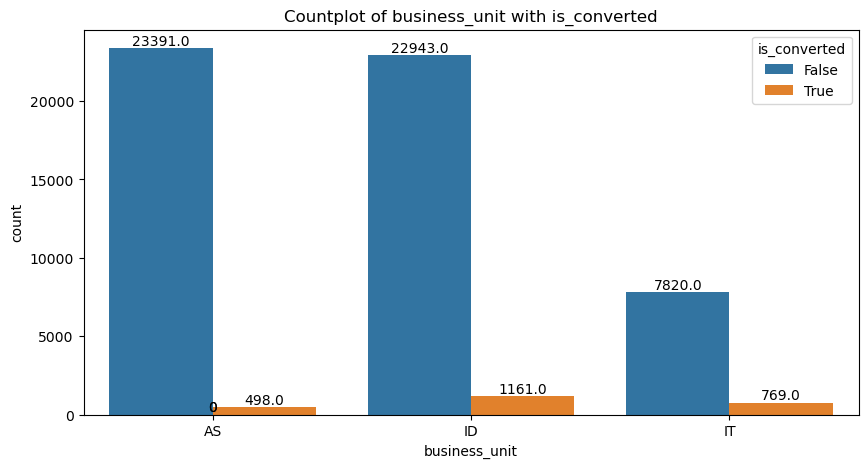

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'business_unit'에 대한 각 카테고리의 개수를 'is_converted'에 따라 나누어 countplot 그리기
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='business_unit', hue='is_converted', data=df_train)

# 각 막대 위에 count를 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Countplot of business_unit with is_converted')
plt.show()

### 4. com_reg_ver_win_rate

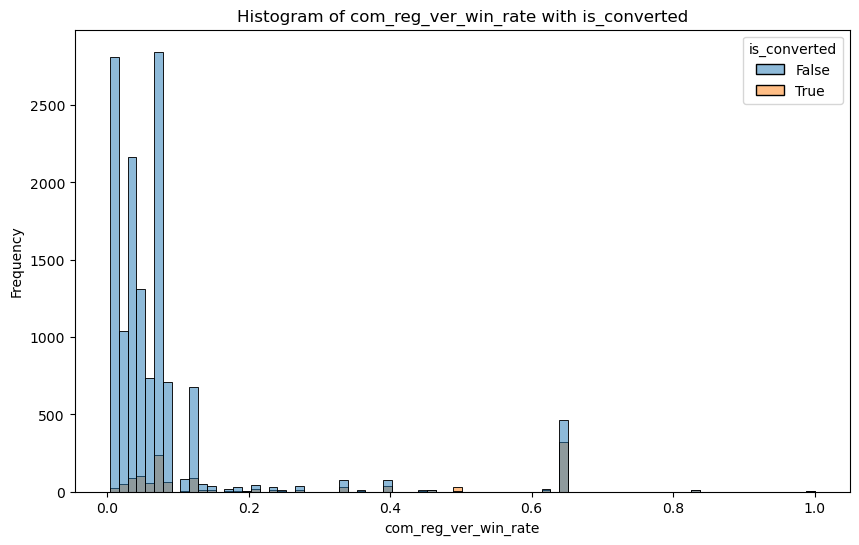

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'com_reg_ver_win_rate' 칼럼의 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='com_reg_ver_win_rate', hue='is_converted', bins=80)
plt.title('Histogram of com_reg_ver_win_rate with is_converted')
plt.xlabel('com_reg_ver_win_rate')
plt.ylabel('Frequency')
plt.show()

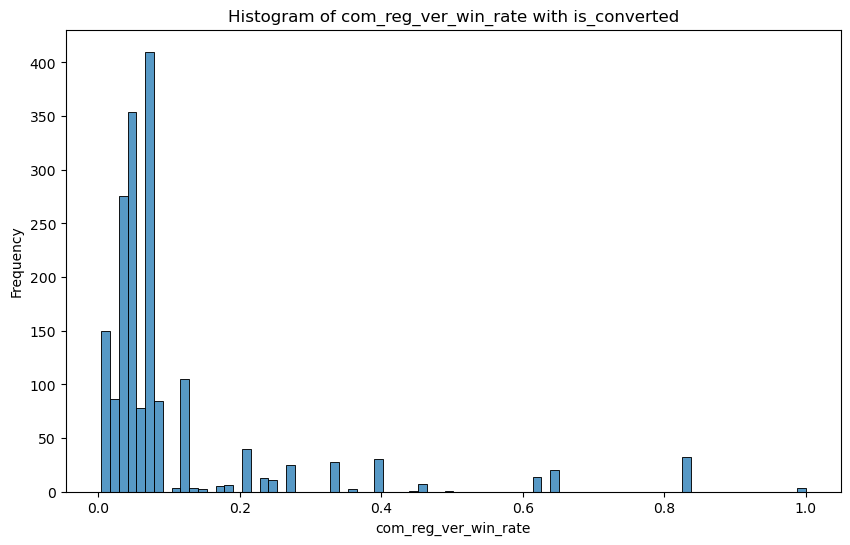

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'com_reg_ver_win_rate' 칼럼의 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(data=df_test, x='com_reg_ver_win_rate', bins=80)
plt.title('Histogram of com_reg_ver_win_rate with is_converted')
plt.xlabel('com_reg_ver_win_rate')
plt.ylabel('Frequency')
plt.show()

## 5. customer_idx

In [136]:
df_cus = df_train.groupby("customer_idx")["is_converted"].count().reset_index()
df_real_cus = df_train.groupby("customer_idx")["is_converted"].sum().reset_index()
df = pd.merge(df_cus, df_real_cus, on="customer_idx")
df["ratio"] = df["is_converted_y"] / df["is_converted_x"]
df = df.rename(columns={"is_converted_x": "query_cnt", "is_converted_y" : "converted_cnt"})
df = df[df["query_cnt"]>=4] 
df_train = pd.merge(df_train, df, on='customer_idx', how="left")
df_test = pd.merge(df_test, df, on='customer_idx', how="left")

In [137]:
pd.set_option("display.max_rows", 30)
df = df.sort_values(by=["ratio", "converted_cnt"], ascending=False)
df

,customer_idx,query_cnt,converted_cnt,ratio
30962,42108,19,19,1.0
6728,9324,14,14,1.0
7095,9857,11,11,1.0
6190,8582,10,10,1.0
13986,19251,8,8,1.0
...,...,...,...,...
34520,46908,5,0,0.0
34522,46914,12,0,0.0
34552,46991,8,0,0.0
34648,47125,4,0,0.0
